In [1]:
import sys
sys.path.append("../..")


from experiments.plt_pab_fae import plt_fab_fae
from protocol.BB84EveTrainableProtocol import BB84EveTrainableProtocol
from protocol.BB84TrainableProtocol import BB84TrainableProtocol
from protocol.connection_elements.Layer import SeparableLayer, EntangledLayer
from protocol.BB84Protocol import BB84Protocol
from protocol.connection_elements.MultiQubitQCLEve import MultiQubitQCLEve


No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit/circuit/quantumcircuit.py:3428: RuntimeWarning: Cregbundle set to False since an instruction needs to refer to individual classical wire
  return circuit_drawer(


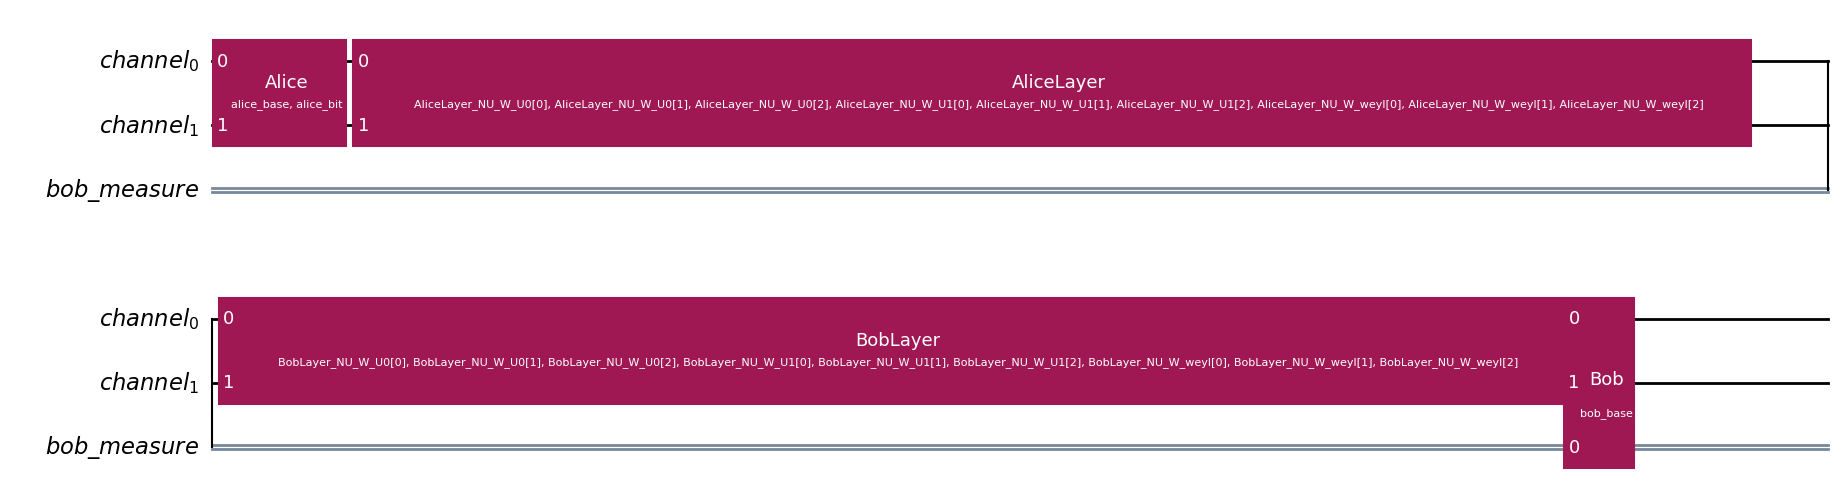

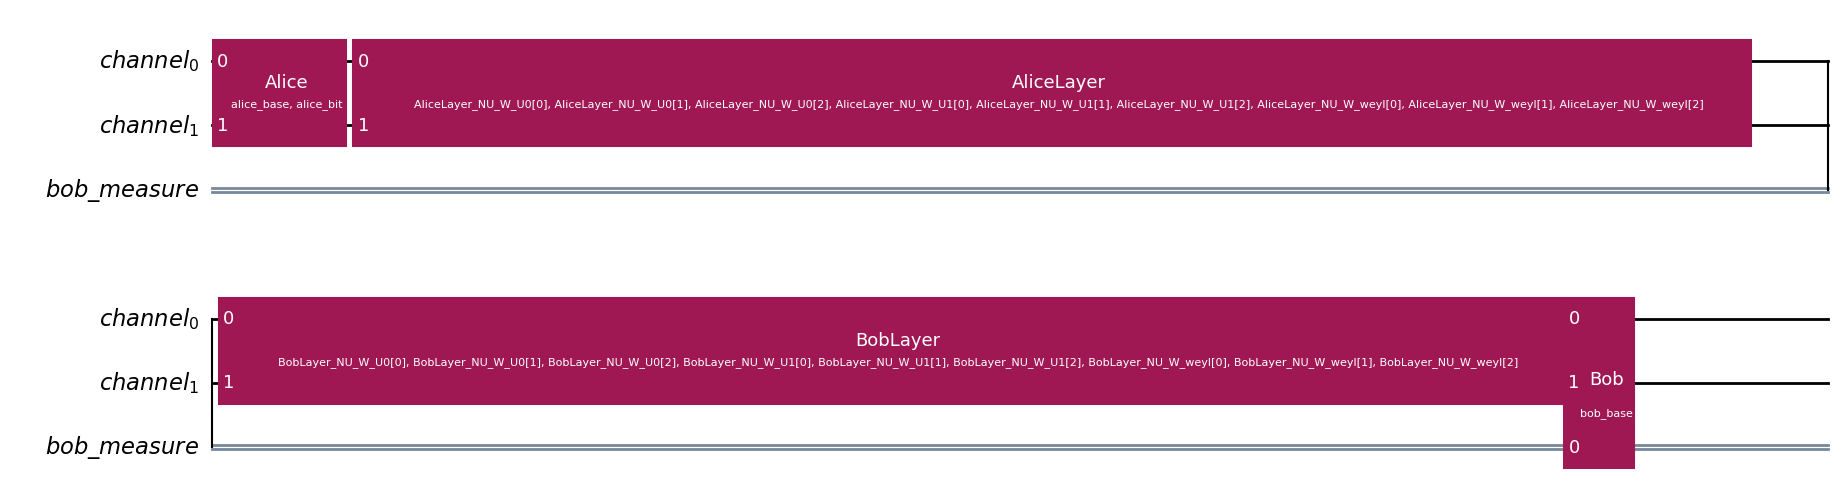

In [2]:
layers = [EntangledLayer("AliceLayer"), EntangledLayer("BobLayer")]
eve = MultiQubitQCLEve()

ab_protocol = BB84TrainableProtocol(n_bits=512, elements=layers, channel_size=2, seed=0, learning_rate=0.1)
eve_protocol = BB84EveTrainableProtocol(n_bits=512, elements=[layers[0], eve, layers[1]], channel_size=2,
                                        seed=0, alpha=1, learning_rate=0.02)

qc, _ = ab_protocol.qc_with_ctx()
qc.draw("mpl", expr_len=3)

In [3]:
def train_eve():
    bob_qber, eve_qber = [], []
    qber = eve_protocol.run()
    bob_qber.append(qber['bob_qber'])
    eve_qber.append(qber['eve_qber'])
    print(f'start QBER: {qber}')
    for epoch in range(50):
        loss = eve_protocol.train()
        qber = eve_protocol.run()
        bob_qber.append(qber['bob_qber'])
        eve_qber.append(qber['eve_qber'])
        if epoch % 5 == 0 or epoch == 49:
            print(f'epoch: {epoch}, loss: {loss}, QBER: {qber}')
    return bob_qber, eve_qber

def train_ab():
    bob_qber, eve_qber = [], []
    qber = ab_protocol.run()
    bob_qber.append(qber['bob_qber'])
    eve_qber.append(0.5)
    print(f'start QBER: {qber}')
    for epoch in range(20):
        loss = ab_protocol.train()
        qber = ab_protocol.run()
        bob_qber.append(qber['bob_qber'])
        eve_qber.append(0.5)
        if epoch % 5 == 0 or epoch == 19:
            print(f'epoch: {epoch}, loss: {loss}, QBER: {qber}')
    return bob_qber, eve_qber

# Krok 1 - trenowanie Alice i Boba do początkowego stanu
Uczymy Alice i Boba bez Eve, aby miały sensowne parametry początkowe i potrafiły przekazywać sobie dane.

In [4]:
b_q, e_q = train_ab()

start QBER: {'bob_qber': np.float64(0.31746031746031744)}
epoch: 0, loss: -0.7028197050094604, QBER: {'bob_qber': np.float64(0.18253968253968256)}
epoch: 5, loss: -0.9891139268875122, QBER: {'bob_qber': np.float64(0.011904761904761862)}
epoch: 10, loss: -0.9671370983123779, QBER: {'bob_qber': np.float64(0.02777777777777779)}
epoch: 15, loss: -0.999096155166626, QBER: {'bob_qber': np.float64(0.003968253968253954)}
epoch: 19, loss: -0.9893959164619446, QBER: {'bob_qber': np.float64(0.003968253968253954)}


<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

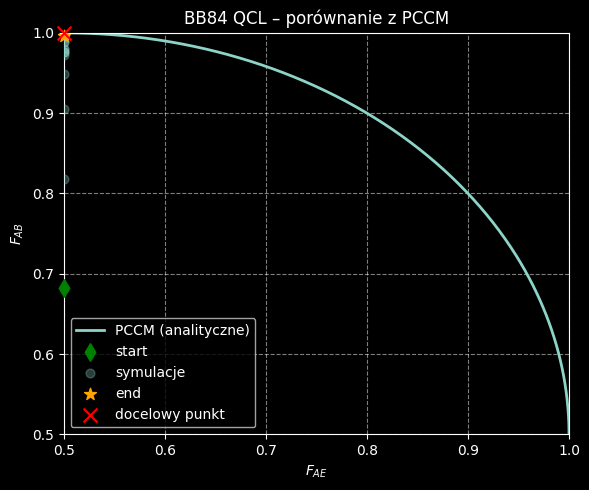

In [5]:
plt_fab_fae(b_q, e_q, 1)

# Krok 2 - trenowanie tylko Eve, warstwy Alice i Boba zamrożone
Uczymy samą Eve, docelowa dokładność Boba to 0.8. Startujemy od parametrów Alice i Boba wytrenowanych w poprzednim kroku i Eve jako identyczność.

In [6]:
eve_protocol.set_parameters(ab_protocol.get_all_parameters())

params = eve_protocol.get_all_parameters()
for p in eve.nu.params():
    k = p.name
    params[k] = 0

eve_protocol.set_parameters(params)
eve_protocol.freeze_elements(layers)
print("Trainable parameters:", eve_protocol.get_unfrozen_parameters())
print("Frozen parameters:", eve_protocol.get_frozen_params())


No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)
No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Trainable parameters: {'NU_W_0_0_U0[0]': np.float32(0.0), 'NU_W_0_0_U0[1]': np.float32(0.0), 'NU_W_0_0_U0[2]': np.float32(0.0), 'NU_W_0_0_U1[0]': np.float32(0.0), 'NU_W_0_0_U1[1]': np.float32(0.0), 'NU_W_0_0_U1[2]': np.float32(0.0), 'NU_W_0_0_weyl[0]': np.float32(0.0), 'NU_W_0_0_weyl[1]': np.float32(0.0), 'NU_W_0_0_weyl[2]': np.float32(0.0), 'NU_W_0_1_U0[0]': np.float32(0.0), 'NU_W_0_1_U0[1]': np.float32(0.0), 'NU_W_0_1_U0[2]': np.float32(0.0), 'NU_W_0_1_U1[0]': np.float32(0.0), 'NU_W_0_1_U1[1]': np.float32(0.0), 'NU_W_0_1_U1[2]': np.float32(0.0), 'NU_W_0_1_weyl[0]': np.float32(0.0), 'NU_W_0_1_weyl[1]': np.float32(0.0), 'NU_W_0_1_weyl[2]': np.float32(0.0), 'NU_W_1_0_U0[0]': np.float32(0.0), 'NU_W_1_0_U0[1]': np.float32(0.0), 'NU_W_1_0_U0[2]': np.float32(0.0), 'NU_W_1_0_U1[0]': np.float32(0.0), 'NU_W_1_0_U1[1]': np.float32(0.0), 'NU_W_1_0_U1[2]': np.float32(0.0), 'NU_W_1_0_weyl[0]': np.float32(0.0), 'NU_W_1_0_weyl[1]': np.float32(0.0), 'NU_W_1_0_weyl[2]': np.float32(0.0), 'NU_W_2_0_U0[0

In [7]:
eve_protocol.f_value = 0.8
eve_protocol.loss = eve_protocol.loss7
b_q, e_q = train_eve()

start QBER: {'bob_qber': np.float64(0.014705882352941124), 'eve_qber': np.float64(0.5367647058823529)}
epoch: 0, loss: -0.5769047737121582, QBER: {'bob_qber': np.float64(0.007352941176470562), 'eve_qber': np.float64(0.5330882352941176)}
epoch: 5, loss: -0.5854971408843994, QBER: {'bob_qber': np.float64(0.0), 'eve_qber': np.float64(0.5220588235294117)}
epoch: 10, loss: -0.614092230796814, QBER: {'bob_qber': np.float64(0.007352941176470562), 'eve_qber': np.float64(0.5110294117647058)}
epoch: 15, loss: -0.6186285018920898, QBER: {'bob_qber': np.float64(0.0), 'eve_qber': np.float64(0.4816176470588235)}
epoch: 20, loss: -0.6267111301422119, QBER: {'bob_qber': np.float64(0.007352941176470562), 'eve_qber': np.float64(0.44852941176470584)}
epoch: 25, loss: -0.694878101348877, QBER: {'bob_qber': np.float64(0.007352941176470562), 'eve_qber': np.float64(0.4411764705882353)}
epoch: 30, loss: -0.7413511872291565, QBER: {'bob_qber': np.float64(0.022058823529411797), 'eve_qber': np.float64(0.37867647

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

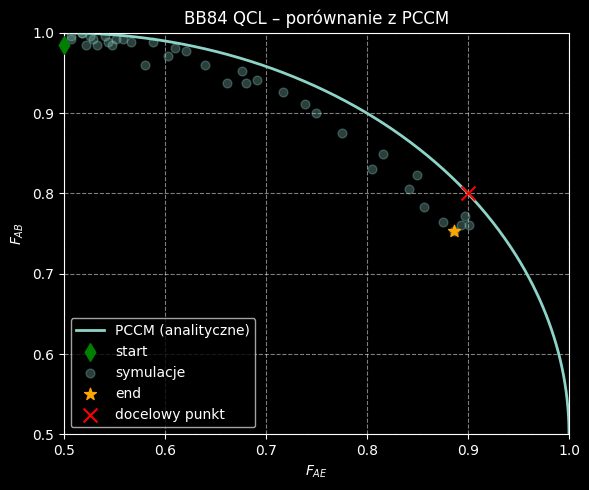

In [8]:
plt_fab_fae(b_q, e_q, 0.8)

# Krok 3 - trenowanie warstw Alice i Boba, Eve zamrożona
Próbujemy uczyć Alice i Boba z użyciem nowej funkcji straty, która maksymalizuje jedynie dokładność Boba.

In [9]:
eve_protocol.freeze_elements([eve])
print("Trainable parameters:", eve_protocol.get_unfrozen_parameters())
print("Frozen parameters:", eve_protocol.get_frozen_params())

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Trainable parameters: {'AliceLayer_NU_W_U0[0]': np.float32(0.729886), 'AliceLayer_NU_W_U0[1]': np.float32(0.6680841), 'AliceLayer_NU_W_U0[2]': np.float32(0.6302171), 'AliceLayer_NU_W_U1[0]': np.float32(-0.3635059), 'AliceLayer_NU_W_U1[1]': np.float32(-1.4941801), 'AliceLayer_NU_W_U1[2]': np.float32(0.21991396), 'AliceLayer_NU_W_weyl[0]': np.float32(-0.008160279), 'AliceLayer_NU_W_weyl[1]': np.float32(-0.042327017), 'AliceLayer_NU_W_weyl[2]': np.float32(-0.5618277), 'BobLayer_NU_W_U0[0]': np.float32(-0.69553316), 'BobLayer_NU_W_U0[1]': np.float32(0.10258672), 'BobLayer_NU_W_U0[2]': np.float32(-0.16569819), 'BobLayer_NU_W_U1[0]': np.float32(0.25984192), 'BobLayer_NU_W_U1[1]': np.float32(0.01961207), 'BobLayer_NU_W_U1[2]': np.float32(1.5441059), 'BobLayer_NU_W_weyl[0]': np.float32(0.07036138), 'BobLayer_NU_W_weyl[1]': np.float32(0.07981029), 'BobLayer_NU_W_weyl[2]': np.float32(-0.7664759)}
Frozen parameters: {'NU_W_0_0_U0[0]': np.float32(0.2033568), 'NU_W_0_0_U0[1]': np.float32(-0.2091218

/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)


In [10]:
eve_loss = eve_protocol.loss
eve_protocol.loss = ab_protocol.loss
b_q, e_q = train_eve()

start QBER: {'bob_qber': np.float64(0.24632352941176472), 'eve_qber': np.float64(0.11397058823529416)}
epoch: 0, loss: -0.7864116430282593, QBER: {'bob_qber': np.float64(0.24264705882352944), 'eve_qber': np.float64(0.11397058823529416)}
epoch: 5, loss: -0.8347777128219604, QBER: {'bob_qber': np.float64(0.20220588235294112), 'eve_qber': np.float64(0.14338235294117652)}
epoch: 10, loss: -0.8675826787948608, QBER: {'bob_qber': np.float64(0.16911764705882348), 'eve_qber': np.float64(0.20588235294117652)}
epoch: 15, loss: -0.9081681966781616, QBER: {'bob_qber': np.float64(0.1470588235294118), 'eve_qber': np.float64(0.25)}
epoch: 20, loss: -0.9291258454322815, QBER: {'bob_qber': np.float64(0.07720588235294112), 'eve_qber': np.float64(0.3272058823529411)}
epoch: 25, loss: -0.9464885592460632, QBER: {'bob_qber': np.float64(0.03676470588235292), 'eve_qber': np.float64(0.38235294117647056)}
epoch: 30, loss: -0.9628872275352478, QBER: {'bob_qber': np.float64(0.044117647058823484), 'eve_qber': np.

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

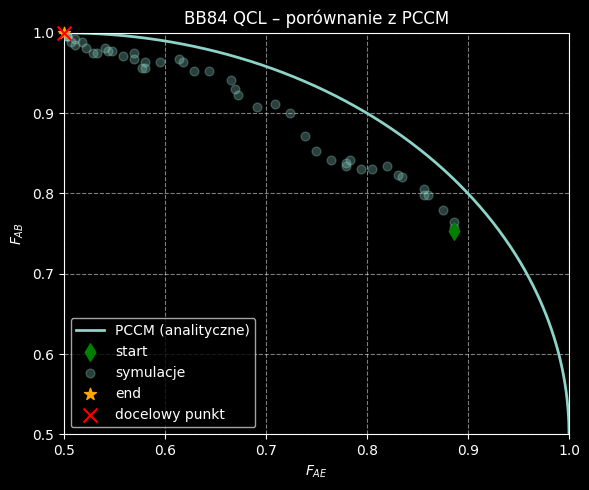

In [11]:
plt_fab_fae(b_q, e_q, 1)

In [12]:
eve_protocol.freeze_elements(layers)
print("Trainable parameters:", eve_protocol.get_unfrozen_parameters())
print("Frozen parameters:", eve_protocol.get_frozen_params())

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Trainable parameters: {'NU_W_0_0_U0[0]': np.float32(0.2033568), 'NU_W_0_0_U0[1]': np.float32(-0.20912188), 'NU_W_0_0_U0[2]': np.float32(0.11369721), 'NU_W_0_0_U1[0]': np.float32(-0.3233851), 'NU_W_0_0_U1[1]': np.float32(-0.2816842), 'NU_W_0_0_U1[2]': np.float32(0.050626703), 'NU_W_0_0_weyl[0]': np.float32(-0.52024585), 'NU_W_0_0_weyl[1]': np.float32(-0.43278453), 'NU_W_0_0_weyl[2]': np.float32(-0.6849725), 'NU_W_0_1_U0[0]': np.float32(-0.3690833), 'NU_W_0_1_U0[1]': np.float32(-0.10016649), 'NU_W_0_1_U0[2]': np.float32(-1.8473133e-09), 'NU_W_0_1_U1[0]': np.float32(-0.5244302), 'NU_W_0_1_U1[1]': np.float32(-0.057466976), 'NU_W_0_1_U1[2]': np.float32(4.3848964e-09), 'NU_W_0_1_weyl[0]': np.float32(-0.14960587), 'NU_W_0_1_weyl[1]': np.float32(-0.13661253), 'NU_W_0_1_weyl[2]': np.float32(-0.101701714), 'NU_W_1_0_U0[0]': np.float32(-0.4676897), 'NU_W_1_0_U0[1]': np.float32(-0.07083022), 'NU_W_1_0_U0[2]': np.float32(-0.26343855), 'NU_W_1_0_U1[0]': np.float32(-0.39214703), 'NU_W_1_0_U1[1]': np.

/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)


In [13]:
eve_protocol.f_value = 0.8
eve_protocol.loss = eve_protocol.loss7
b_q, e_q = train_eve()

start QBER: {'bob_qber': np.float64(0.0), 'eve_qber': np.float64(0.5036764705882353)}
epoch: 0, loss: -0.6289995908737183, QBER: {'bob_qber': np.float64(0.011029411764705843), 'eve_qber': np.float64(0.47058823529411764)}
epoch: 5, loss: -0.8456820249557495, QBER: {'bob_qber': np.float64(0.09191176470588236), 'eve_qber': np.float64(0.27941176470588236)}
epoch: 10, loss: -1.0074689388275146, QBER: {'bob_qber': np.float64(0.19852941176470584), 'eve_qber': np.float64(0.1875)}
epoch: 15, loss: -1.075028657913208, QBER: {'bob_qber': np.float64(0.2683823529411765), 'eve_qber': np.float64(0.09926470588235292)}
epoch: 20, loss: -1.1312646865844727, QBER: {'bob_qber': np.float64(0.22058823529411764), 'eve_qber': np.float64(0.09926470588235292)}
epoch: 25, loss: -1.1472936868667603, QBER: {'bob_qber': np.float64(0.23161764705882348), 'eve_qber': np.float64(0.09926470588235292)}
epoch: 30, loss: -1.1442629098892212, QBER: {'bob_qber': np.float64(0.24632352941176472), 'eve_qber': np.float64(0.09558

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

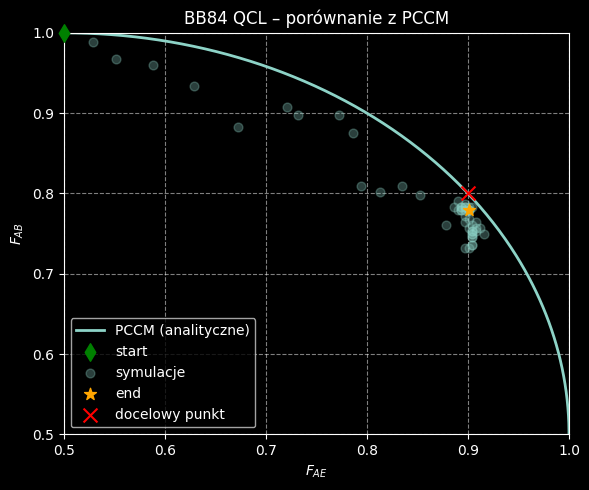

In [14]:
plt_fab_fae(b_q, e_q, 0.8)

In [15]:
eve_protocol.freeze_elements([eve])
print("Trainable parameters:", eve_protocol.get_unfrozen_parameters())
print("Frozen parameters:", eve_protocol.get_frozen_params())

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Trainable parameters: {'AliceLayer_NU_W_U0[0]': np.float32(0.034335796), 'AliceLayer_NU_W_U0[1]': np.float32(0.94567287), 'AliceLayer_NU_W_U0[2]': np.float32(1.2389691), 'AliceLayer_NU_W_U1[0]': np.float32(0.5111232), 'AliceLayer_NU_W_U1[1]': np.float32(-1.627166), 'AliceLayer_NU_W_U1[2]': np.float32(0.21991396), 'AliceLayer_NU_W_weyl[0]': np.float32(0.7061854), 'AliceLayer_NU_W_weyl[1]': np.float32(0.5659021), 'AliceLayer_NU_W_weyl[2]': np.float32(-0.40344974), 'BobLayer_NU_W_U0[0]': np.float32(-0.057141982), 'BobLayer_NU_W_U0[1]': np.float32(-0.097121626), 'BobLayer_NU_W_U0[2]': np.float32(-0.59764755), 'BobLayer_NU_W_U1[0]': np.float32(0.24083133), 'BobLayer_NU_W_U1[1]': np.float32(-0.39279526), 'BobLayer_NU_W_U1[2]': np.float32(1.633308), 'BobLayer_NU_W_weyl[0]': np.float32(0.1937014), 'BobLayer_NU_W_weyl[1]': np.float32(-0.010173786), 'BobLayer_NU_W_weyl[2]': np.float32(-1.017552)}
Frozen parameters: {'NU_W_0_0_U0[0]': np.float32(0.08055059), 'NU_W_0_0_U0[1]': np.float32(-0.214603

/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)


In [16]:
eve_protocol.loss = ab_protocol.loss
b_q, e_q = train_eve()

start QBER: {'bob_qber': np.float64(0.22058823529411764), 'eve_qber': np.float64(0.09926470588235292)}
epoch: 0, loss: -0.8031855225563049, QBER: {'bob_qber': np.float64(0.2095588235294118), 'eve_qber': np.float64(0.1029411764705882)}
epoch: 5, loss: -0.8171536922454834, QBER: {'bob_qber': np.float64(0.20588235294117652), 'eve_qber': np.float64(0.11029411764705888)}
epoch: 10, loss: -0.8365671038627625, QBER: {'bob_qber': np.float64(0.18382352941176472), 'eve_qber': np.float64(0.125)}
epoch: 15, loss: -0.846372127532959, QBER: {'bob_qber': np.float64(0.18014705882352944), 'eve_qber': np.float64(0.15441176470588236)}
epoch: 20, loss: -0.8634847402572632, QBER: {'bob_qber': np.float64(0.16911764705882348), 'eve_qber': np.float64(0.19852941176470584)}
epoch: 25, loss: -0.8749268054962158, QBER: {'bob_qber': np.float64(0.1470588235294118), 'eve_qber': np.float64(0.2647058823529411)}
epoch: 30, loss: -0.8959723711013794, QBER: {'bob_qber': np.float64(0.13235294117647056), 'eve_qber': np.flo

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

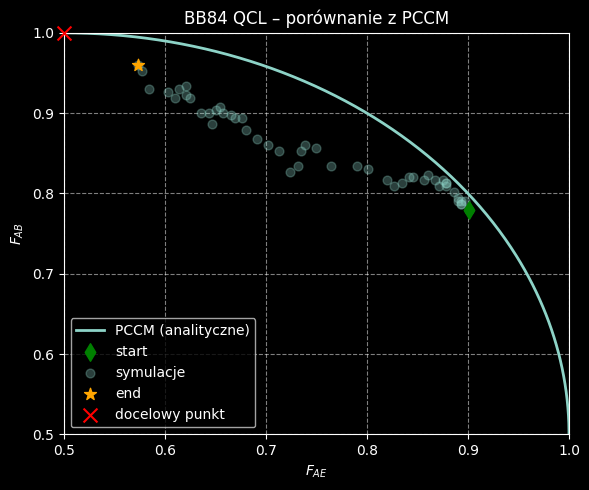

In [17]:
plt_fab_fae(b_q, e_q, 1)

In [18]:
print("All parameters:", eve_protocol.get_all_parameters())

All parameters: {'NU_W_0_0_U0[0]': np.float32(0.08055059), 'NU_W_0_0_U0[1]': np.float32(-0.21460351), 'NU_W_0_0_U0[2]': np.float32(-0.017155753), 'NU_W_0_0_U1[0]': np.float32(-0.1416003), 'NU_W_0_0_U1[1]': np.float32(-0.49534196), 'NU_W_0_0_U1[2]': np.float32(-0.094398834), 'NU_W_0_0_weyl[0]': np.float32(-0.67556655), 'NU_W_0_0_weyl[1]': np.float32(-0.93717575), 'NU_W_0_0_weyl[2]': np.float32(-0.5559087), 'NU_W_0_1_U0[0]': np.float32(-0.23036052), 'NU_W_0_1_U0[1]': np.float32(0.10572761), 'NU_W_0_1_U0[2]': np.float32(-1.8473133e-09), 'NU_W_0_1_U1[0]': np.float32(-0.6582815), 'NU_W_0_1_U1[1]': np.float32(0.14721203), 'NU_W_0_1_U1[2]': np.float32(2.8456784e-09), 'NU_W_0_1_weyl[0]': np.float32(-0.29101217), 'NU_W_0_1_weyl[1]': np.float32(-0.23183104), 'NU_W_0_1_weyl[2]': np.float32(0.04947956), 'NU_W_1_0_U0[0]': np.float32(-0.16722079), 'NU_W_1_0_U0[1]': np.float32(-0.27800438), 'NU_W_1_0_U0[2]': np.float32(-0.47243536), 'NU_W_1_0_U1[0]': np.float32(-0.49116498), 'NU_W_1_0_U1[1]': np.floa

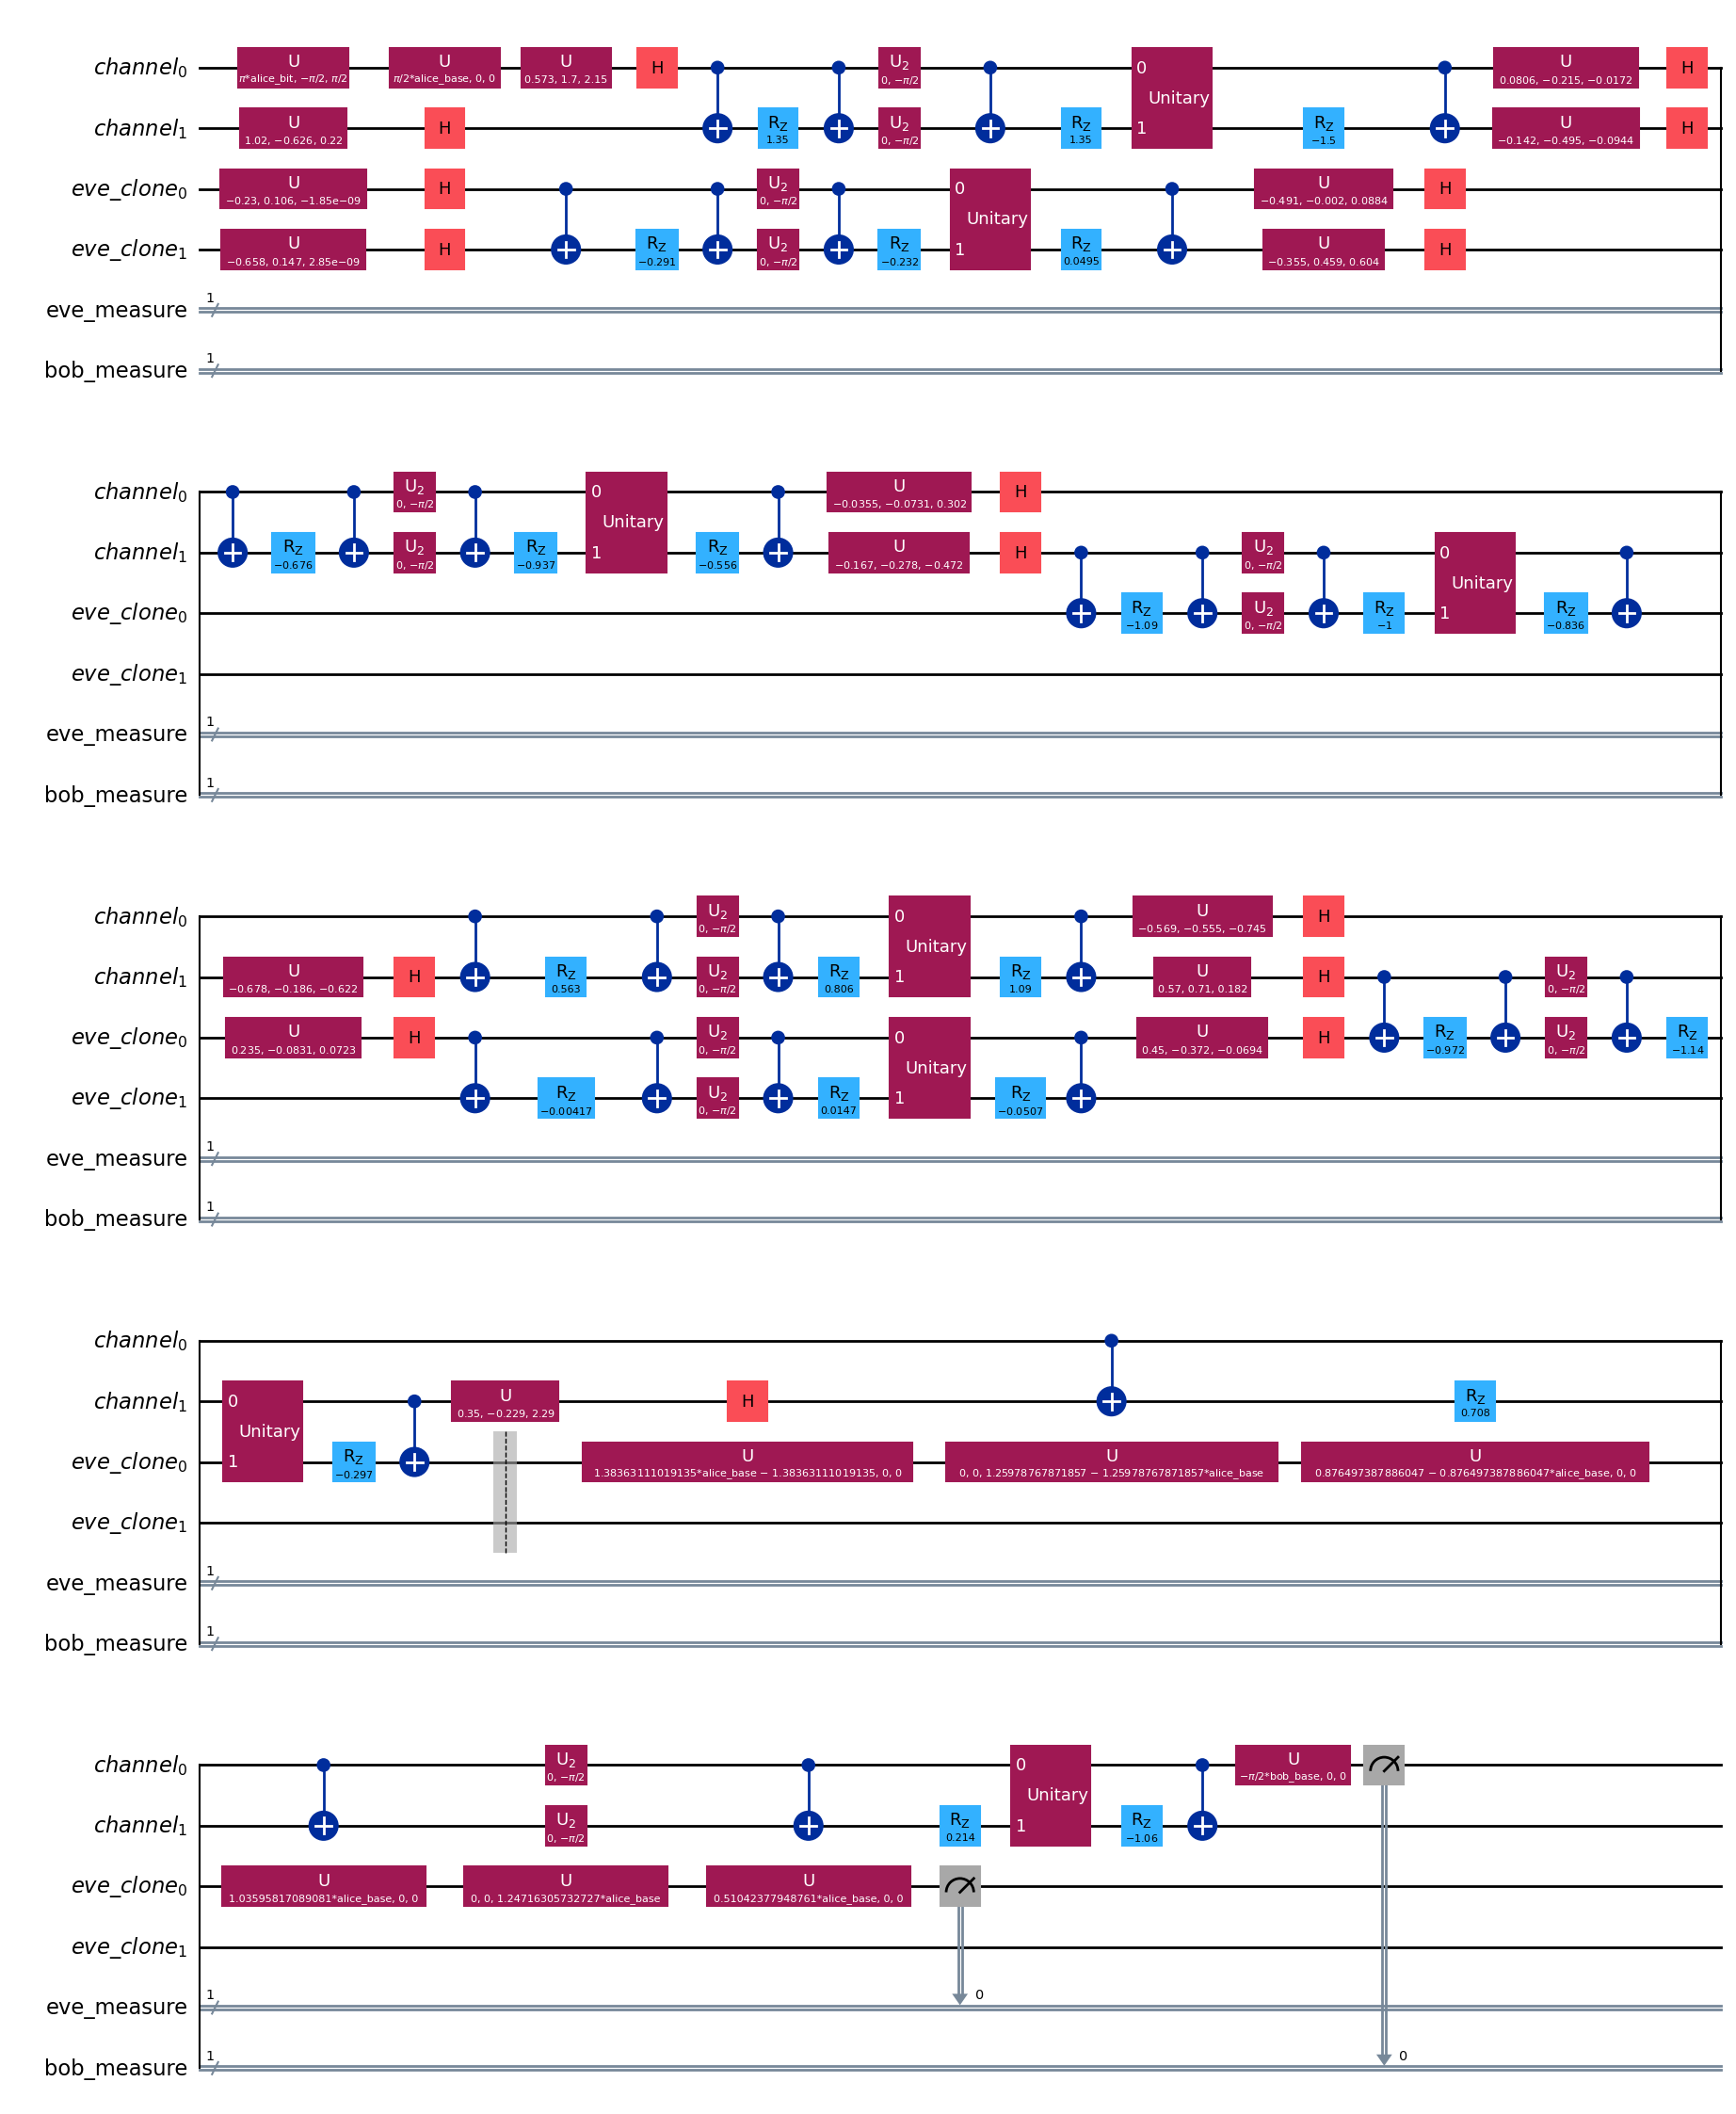

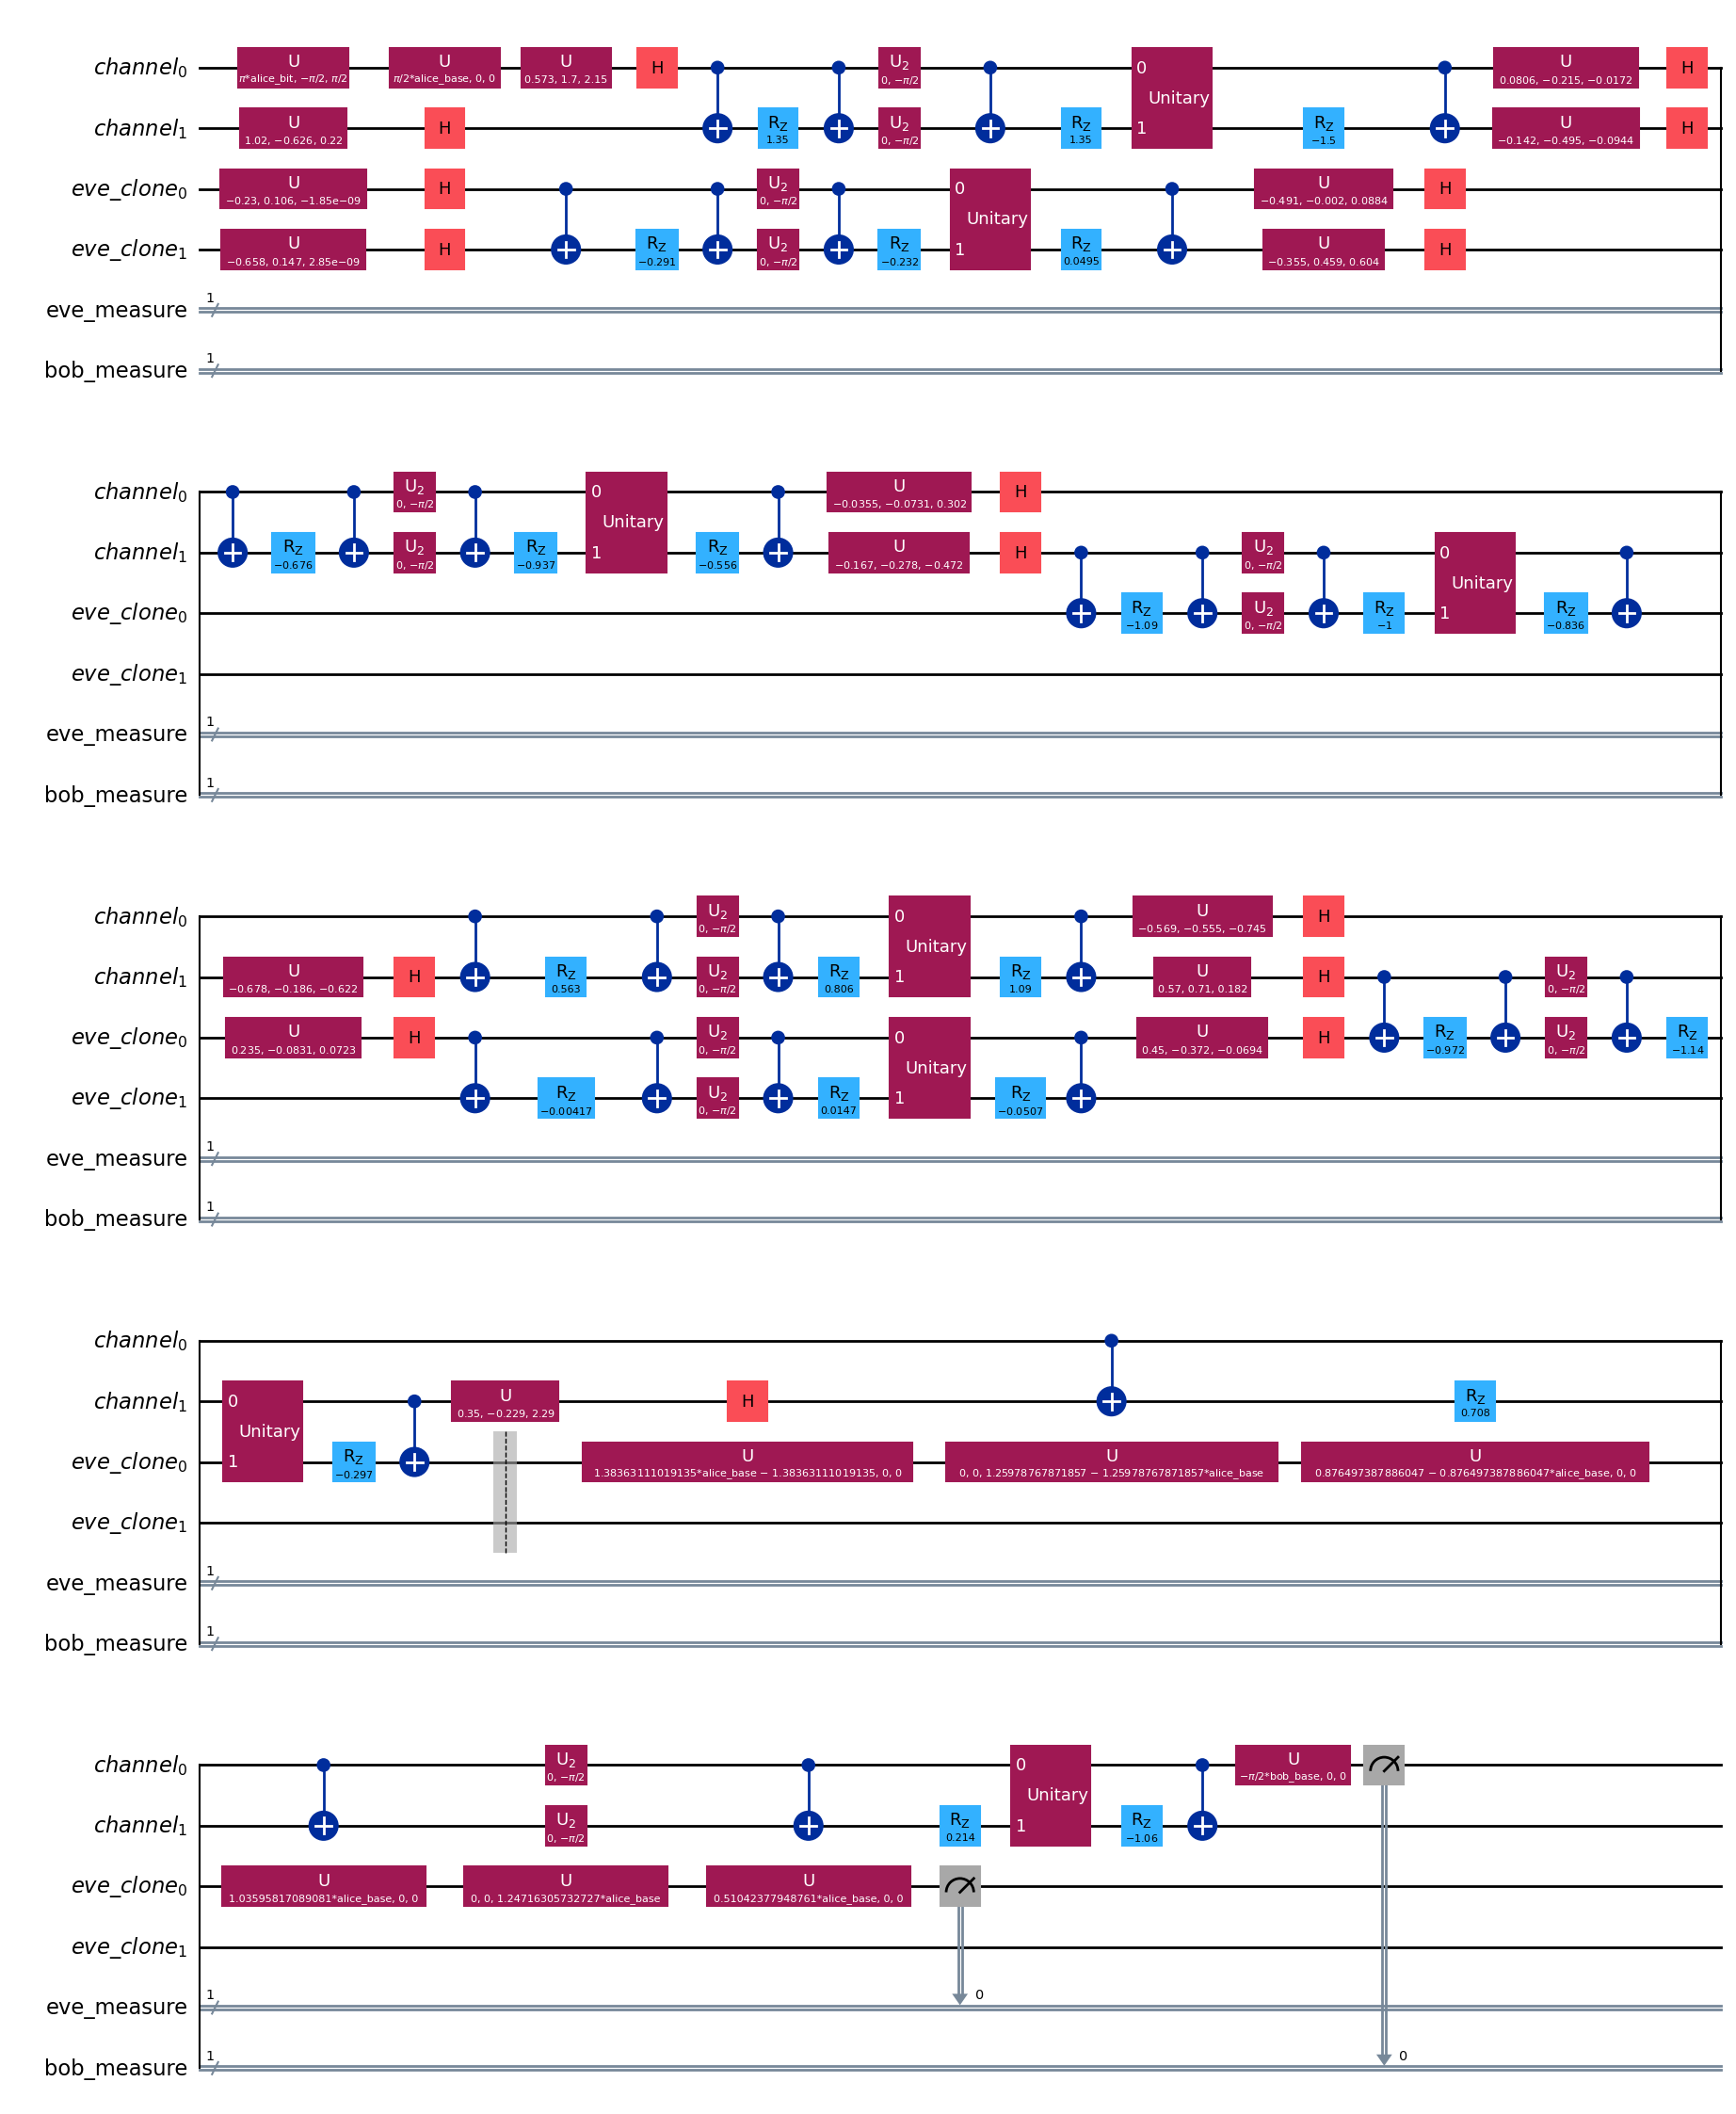

In [19]:
eve_protocol._qc.assign_parameters(eve_protocol.get_all_parameters()).draw("mpl")